In [1]:
import robot_plotter as rp
import models_functions as mf
import traj
import numpy as np
import matplotlib.pyplot as plt
import robot_sim as sim

In [2]:
# generate reference trajectory
dt = 0.01
xa1 = np.zeros((mf.STATE_LEN, 1)); xa1[:6] = np.array([[-1.57],[0],[0.5],[5],[0.1],[-0.1]])
xb1 = np.zeros((mf.STATE_LEN, 1)); xb1[:6] = np.array([[0],[0],[6],[6.5],[0.2],[0]])
xc1 = np.zeros((mf.STATE_LEN, 1)); xc1[:6] = np.array([[-1.57],[0],[9.5],[4],[0],[-0.1]])

posa, y_IMUa = traj.gen_poly_traj(xa1, xb1, t0=0, tf=30, dt=dt)
posb, y_IMUb = traj.gen_poly_traj(xb1, xc1, t0=0, tf=30, dt=dt)
pos1 = np.append(posa[:,:-1], posb, axis=1) # Remember to remove repeated position!!
y_IMU1 = np.append(y_IMUa[:,:-1], y_IMUb, axis=1)

xa2 = np.zeros((mf.STATE_LEN, 1)); xa2[:6] = np.array([[0],[0],[0.5],[3],[0.1],[0]])
xb2 = np.zeros((mf.STATE_LEN, 1)); xb2[:6] = np.array([[3.14],[0],[7],[5],[-0.5],[0]])
xc2 = np.zeros((mf.STATE_LEN, 1)); xc2[:6] = np.array([[-1.57],[0],[3],[0.5],[0],[-0.1]])

posa, y_IMUa = traj.gen_poly_traj(xa2, xb2, t0=0, tf=30, dt=dt)
posb, y_IMUb = traj.gen_poly_traj(xb2, xc2, t0=0, tf=30, dt=dt)
pos2 = np.append(posa[:,:-1], posb, axis=1) # Remember to remove repeated position!!
y_IMU2 = np.append(y_IMUa[:,:-1], y_IMUb, axis=1)

xa3 = np.zeros((mf.STATE_LEN, 1)); xa3[:6] = np.array([[1.57],[0],[0.5],[0.5],[0],[0.1]])
xb3 = np.zeros((mf.STATE_LEN, 1)); xb3[:6] = np.array([[0],[0],[6],[2],[0],[-0.1]])
xc3 = np.zeros((mf.STATE_LEN, 1)); xc3[:6] = np.array([[-1.57],[0],[9],[3],[0],[0.1]])

posa, y_IMUa = traj.gen_poly_traj(xa3, xb3, t0=0, tf=30, dt=dt)
posb, y_IMUb = traj.gen_poly_traj(xb3, xc3, t0=0, tf=30, dt=dt)
pos3 = np.append(posa[:,:-1], posb, axis=1) # Remember to remove repeated position!!
y_IMU3 = np.append(y_IMUa[:,:-1], y_IMUb, axis=1)

pos_len = pos1.shape[1] # Assumes that all paths have the same length

# Generate anchors position:
xanc1 = np.zeros((mf.STATE_LEN, 1)); xanc1[mf.X_P] = np.array([[5],[4]])

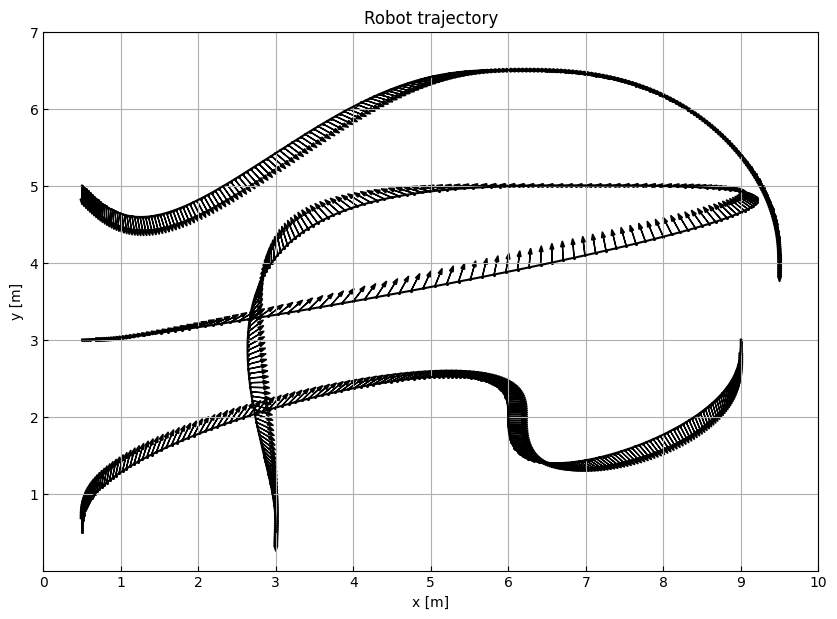

In [3]:
# Generate noise
R_b = 0.0009
R_r = 0.001
R_w = 0.0002
R_a = 0.004

Q=np.diag([0.1e6, 8.0e6, 8.0e6, 0.000001, 0.00001, 0.00001])
R=np.diag([R_b, R_r, R_w, R_a, R_a]) # approx vaules from datasheets
P=np.diag([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0004,0.01,0.01]) # Initialize with system noise for bias

np.random.seed(1000)
y_IMU1 = traj.gen_noise(y_IMU1, dt=1, sigma=np.diag([0, 0, 0]), bias=np.array([[0.0],[0.],[-0.]]))
y_IMU2 = traj.gen_noise(y_IMU2, dt=1, sigma=np.diag([0, 0, 0]), bias=np.array([[-0.0],[0.],[0.]]))
y_IMU3 = traj.gen_noise(y_IMU3, dt=1, sigma=np.diag([0, 0, 0]), bias=np.array([[0.0],[-0.],[0.]]))

# Preview plot:
fig, axtest = rp.setup_plot()
rp.plot_position(axtest, pos1[:,::25], color='black')
rp.plot_position(axtest, pos2[:,::25], color='black')
rp.plot_position(axtest, pos3[:,::25], color='black')

anchor1 = sim.Anchor(x0=xanc1)


In [ ]:
# Run LUFT algorithm
robotL1 = sim.robot_luft(x0=xa1, path=pos1, imu=y_IMU1, dt=dt, Q=Q, R=R, P=P, id=111)
robotL2 = sim.robot_luft(x0=xa2, path=pos2, imu=y_IMU2, dt=dt, Q=Q, R=R, P=P, id=222)
robotL3 = sim.robot_luft(x0=xa3, path=pos3, imu=y_IMU3, dt=dt, Q=Q, R=R, P=P, id=333)

np.random.seed(0)
for i in range(pos_len-1):
    robotL1.predict(imu_correct=False)
    robotL2.predict(imu_correct=False)
    robotL3.predict(imu_correct=False)
    if (i > 0 and i % 10 == 0):
        print(i)
        #robotL1.anchor_meas(anchor1, sr=0, sb=0)
        robotL2.robot_meas_luft(robotL1, sr=0, sb=0)
        #robotL3.robot_meas_luft(robotL2, sr=0, sb=0)

10
Adding new robot: 222
Adding new robot: 111
[8.53117046e+05 3.45364499e+03 7.84349277e+02 5.97107069e-04
 2.70485626e-01 4.13023116e+05 8.82204910e+05 8.82204910e+05
 8.80006155e+02 8.80006155e+02 6.72613664e+01 1.10275376e+04
 4.98627399e-04 1.81182852e-01 1.81182852e-01 1.09825521e+01
 4.00110000e-04 1.00011000e-02 1.00011000e-02 4.00110000e-04
 1.00011000e-02 1.00011000e-02]
Adding new robot: 333
Adding new robot: 222
[8.54158399e+05 8.77274127e+05 7.25702053e+05 4.13023114e+05
 3.59621959e+03 3.28958782e+03 8.63552322e+02 7.90563675e+02
 7.25935136e+02 6.72613581e+01 1.19352429e+00 2.33809029e-01
 1.77282287e-01 1.78014836e-01 6.79694350e-04 4.98602907e-04
 4.00110000e-04 1.00011000e-02 1.00011000e-02 4.00110000e-04
 1.00011000e-02 1.00011000e-02]
20
[1.32798887e+06 1.69206732e+06 1.56737847e+06 6.15191183e+05
 9.06502677e+03 6.12987649e+03 5.27843078e+03 2.00326425e+03
 2.12107755e+04 2.50967961e+02 6.48914165e+00 4.44181183e+00
 4.05482343e+00 5.95706444e-04 4.99833895e-04 7.6

c:\Users\marcu\OneDrive\Dokumenter\uni\msc_master\repo1\UWB_Rasberry\Sim\models_functions.py:935: RuntimeWarning: invalid value encountered in sqrt
  prob = (1/2*np.pi)*(1/np.sqrt(np.linalg.det(S))) * np.exp(-(1/2)*np.transpose(inno) @ np.linalg.inv(S) @ inno)


ValueError: could not broadcast input array from shape (11,0) into shape (11,1)

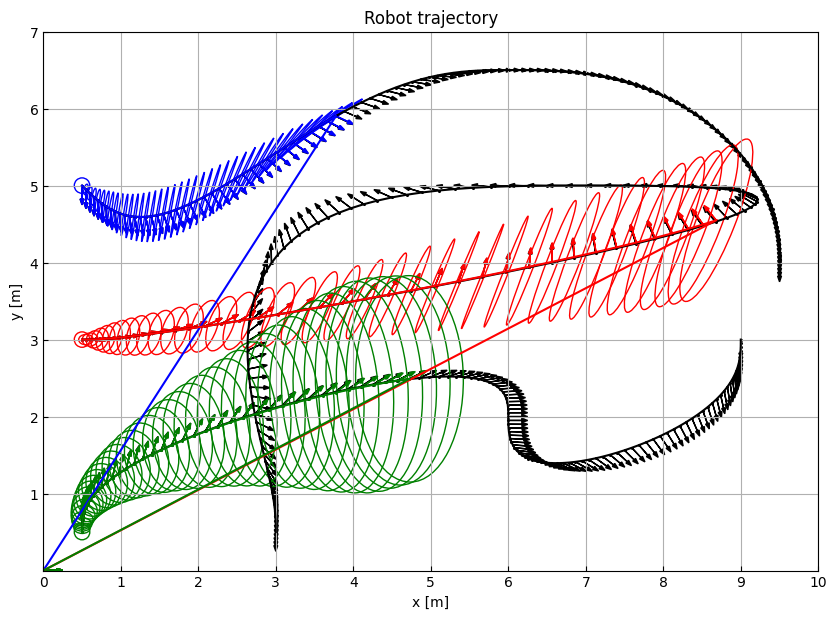

In [14]:
# Plot the quantuties we have logged:
x_logL1 = robotL1.x_log
P_logL1 = robotL1.P_log
x_logL2 = robotL2.x_log
P_logL2 = robotL2.P_log       
x_logL3 = robotL3.x_log
P_logL3 = robotL3.P_log 

# Plot ground truth
fig, ax = rp.setup_plot()
rp.plot_position(ax, pos1[:,::50], color='black')
rp.plot_position(ax, pos2[:,::50], color='black')
rp.plot_position(ax, pos3[:,::50], color='black')

# Plot states of robots:
rp.plot_position2(ax, x_logL1[:,::50], P_logL1[:,:,::50], color='blue')
rp.plot_position2(ax, x_logL2[:,::50], P_logL2[:,:,::50], color='red')
rp.plot_position2(ax, x_logL3[:,::50], P_logL3[:,:,::50], color='green')

In [22]:
# Run naive algorithm
# Setup robots and anchors:
robot1 = sim.Robot_single(x0=xa1, path=pos1, imu=y_IMU1, dt=dt, Q=Q, R=R, P=P)
robot2 = sim.Robot_single(x0=xa2, path=pos2, imu=y_IMU2, dt=dt, Q=Q, R=R, P=P)
robot3 = sim.Robot_single(x0=xa3, path=pos3, imu=y_IMU3, dt=dt, Q=Q, R=R, P=P)

np.random.seed(0)
for i in range(pos_len-1):
    robot1.predict()
    robot2.predict()
    robot3.predict()
    if (i > 0 and i % 100 == 0):
        robot1.anchor_meas(anchor1, sr=0, sb=0)
        #robot2.anchor_meas(anchor1, sr=0, sb=0)
        #robot3.anchor_meas(anchor1, sr=0, sb=0)
        robot2.robot_meas(robot1, sr=0, sb=0)
        robot3.robot_meas(robot2, sr=0, sb=0)
        

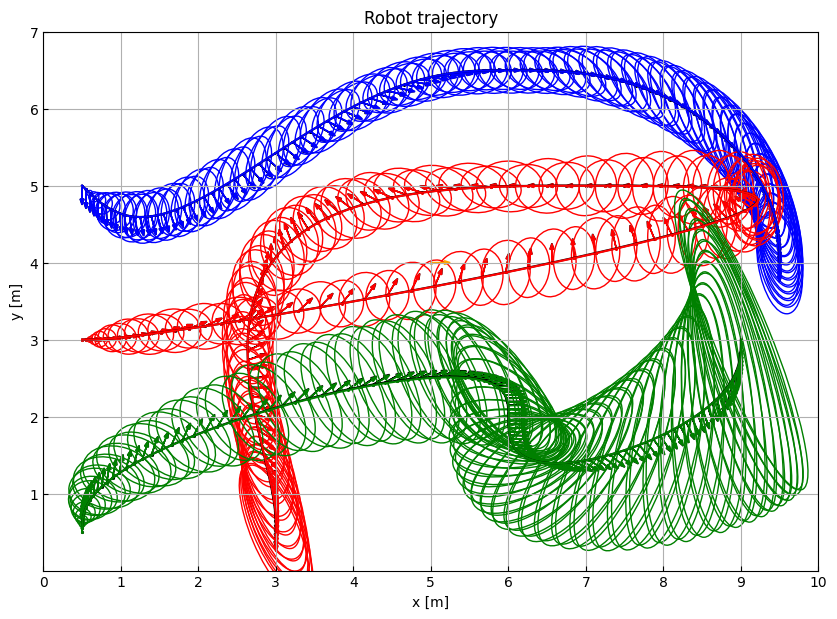

In [23]:
# Plot the quantuties we have logged:
x_log1 = robot1.x_log
P_log1 = robot1.P_log
x_log2 = robot2.x_log
P_log2 = robot2.P_log       
x_log3 = robot3.x_log
P_log3 = robot3.P_log 

# Plot ground truth
fig, ax = rp.setup_plot()
rp.plot_position(ax, pos1[:,::50], color='black')
rp.plot_position(ax, pos2[:,::50], color='black')
rp.plot_position(ax, pos3[:,::50], color='black')

# Plot states of robots:
rp.plot_position2(ax, x_log1[:,::50], P_log1[:,:,::50], color='blue')
rp.plot_position2(ax, x_log2[:,::50], P_log2[:,:,::50], color='red')
rp.plot_position2(ax, x_log3[:,::50], P_log3[:,:,::50], color='green')

# Plot anchors
anchor1.draw_position(ax, color='orange')

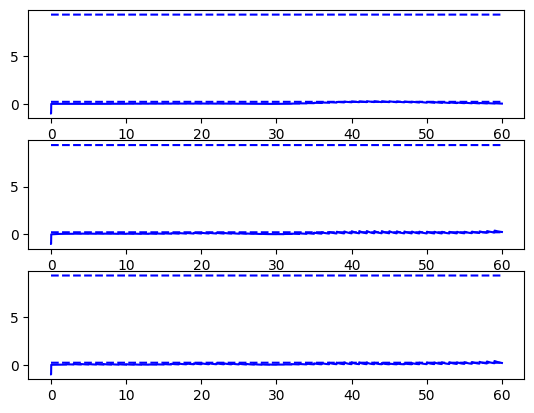

In [15]:
# NEES analysis
# If higher than confidence interval, then the estimate is overconfident
fig, axs = plt.subplots(3)
pos_ind = [0, 2, 3]
rp.plot_NEES(axs[0], 
             x_est=x_log1[pos_ind,:],
             x_true=robot1.path[:3,:], 
             P=P_log1[np.ix_(pos_ind, pos_ind)], 
             dt=dt,
             prob=0.95)
rp.plot_NEES(axs[1], 
             x_est=x_log2[pos_ind,:],
             x_true=robot2.path[:3,:], 
             P=P_log2[np.ix_(pos_ind, pos_ind)], 
             dt=dt,
             prob=0.95)
rp.plot_NEES(axs[2], 
             x_est=x_log3[pos_ind,:],
             x_true=robot3.path[:3,:], 
             P=P_log3[np.ix_(pos_ind, pos_ind)], 
             dt=dt,
             prob=0.95)

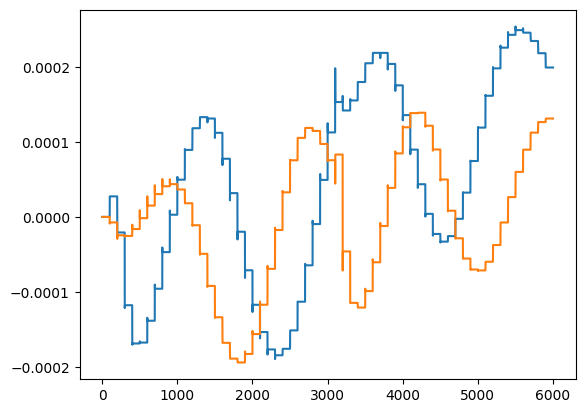

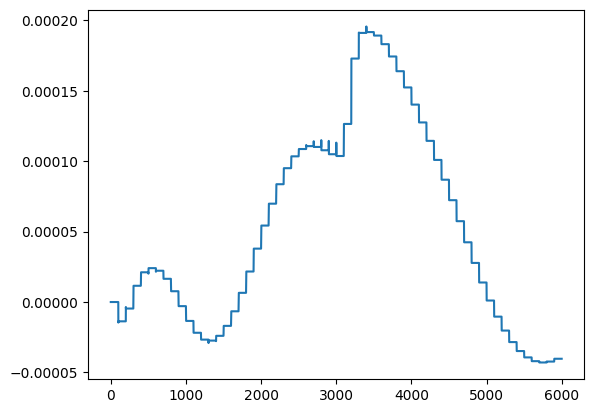

In [16]:
# Plot bias states:
# For acc:
plt.figure()
plt.plot(x_log2[9,:])
plt.plot(x_log2[10,:])
plt.figure()
plt.plot(x_log2[8,:])